In [17]:
import datetime
import time
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Carga de Datos

In [18]:
# Definir la variable coin
coin = 'vechain'

# Definir la ruta del archivo CSV según la variable coin
csv_path = f'../csv/{coin}.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

     Market Cap     Price        Volume        Date
0  1.317939e+09  0.024916  9.689896e+07  2018-07-27
1  1.321200e+09  0.024978  4.303242e+07  2018-07-28
2  1.357667e+09  0.025667  1.792036e+07  2018-07-29
3  1.394918e+09  0.026372  2.354678e+07  2018-07-30
4  1.339962e+09  0.025333  2.743729e+07  2018-07-31


# Información básica del DataFrame

In [19]:
# Información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Market Cap  1854 non-null   float64
 1   Price       1854 non-null   float64
 2   Volume      1854 non-null   float64
 3   Date        1854 non-null   object 
dtypes: float64(3), object(1)
memory usage: 58.1+ KB
None


No se observan valores nulos u otros datos inconsistentes y los valores atipicos aportan informacion valiosa al EDA. Se puede uilizar el Data Frame sin necesidad de otros tratamientos iniciales.

# Estadísticas resumidas

In [20]:
print(df.describe())

         Market Cap        Price        Volume
count  1.854000e+03  1854.000000  1.854000e+03
mean   2.270709e+09     0.034234  2.813859e+08
std    2.821493e+09     0.042759  5.427479e+08
min    1.464278e+08     0.002320  3.176744e+06
25%    4.011245e+08     0.006846  3.583033e+07
50%    1.290889e+09     0.018405  1.048087e+08
75%    2.288201e+09     0.032791  2.586850e+08
max    1.691671e+10     0.260787  7.564209e+09



El precio es volátil, su desviación estándar mayor que su media, el precio ha cambiado en gran medida en cortos períodos de tiempo, el precio máximo fue muy alto en comparación.

La capitalización de mercado es también volátil, la desviación estándar es mayor que la media.

El volumen es muy volátil, la desviación estándar es casi el doble que la media.

Estas observaciones iniciales indican que Vechain podría considerarse muy volátil en comparación con activos financieros tradicionales.
En general, las estadísticas dadas indican que es una criptomoneda muy volátil con un amplio rango de precios 

# Histograma de Precios

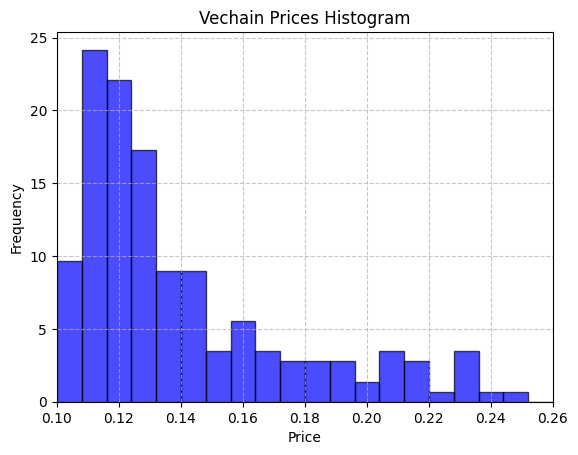

In [7]:
# Crear el histograma
plt.hist(df['Price'], bins=20, range=(0.1, 0.260), color='blue', edgecolor='black', density=True, alpha=0.7)

# Configurar límites del eje X
plt.xlim(0.1, 0.260)

# Configurar etiquetas y título
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'{coin.capitalize()} Prices Histogram')

# Mostrar la trama
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Una observación preliminar de los precios, sugiere aproximarse a una distribución de datos normal, en la que la mayoría de los valores tienden a agruparse fuertemente alrededor de los valores de precios mas frecuentes.

# Gráficos de dispersión (scatter plot)

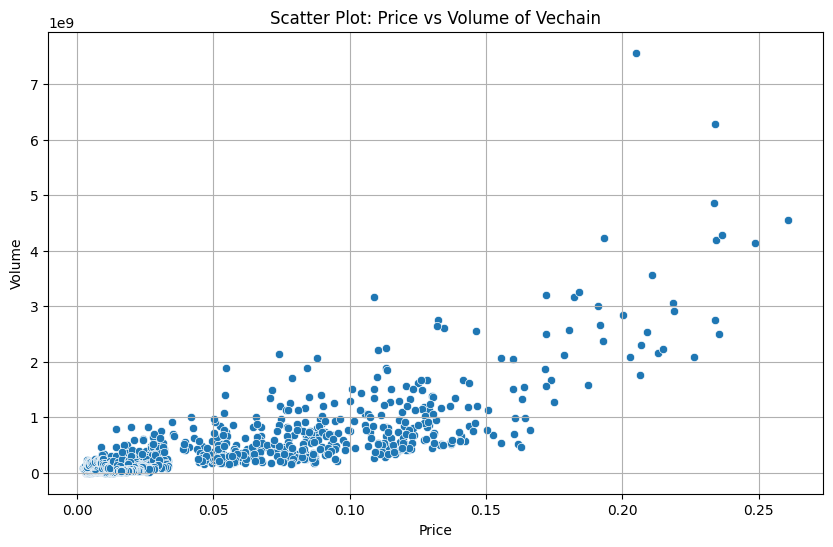

In [8]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Volume')
plt.title(f'Scatter Plot: Price vs Volume of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

No se observan muchos puntos que se desvíen significativamente de la tendencia general en los precios mas frecuentes, a precios altos estos puntos podrían representar eventos excepcionales que causaron un volumen inusual en relación con el precio.
El volumen tiende a aumentar cuando el precio sube, esto puede entenderse como una mayor actividad comercial cuando el precio es alcista.

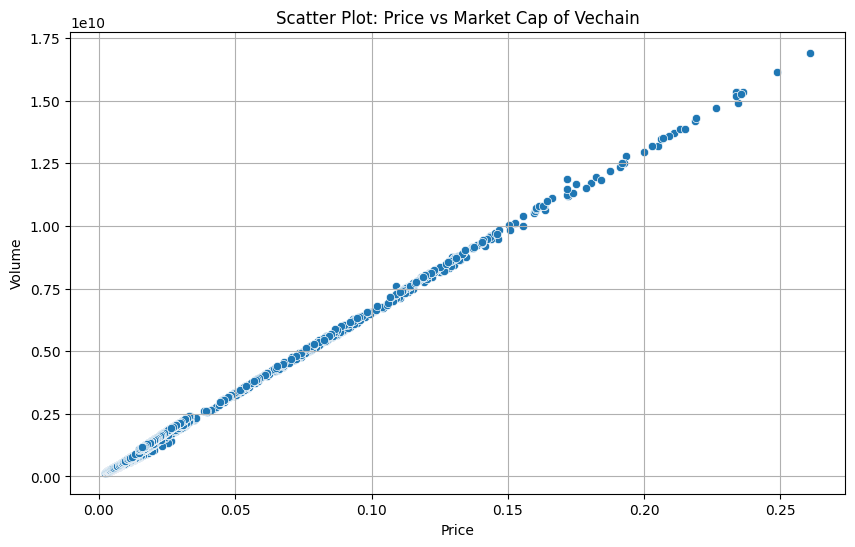

In [9]:
# Grafica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Market Cap')
plt.title(f'Scatter Plot: Price vs Market Cap of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [14]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[['Price', 'Market Cap']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
               Price  Market Cap
Price       1.000000    0.999371
Market Cap  0.999371    1.000000


La capitalización de mercado es el precio multiplicado por la cantidad de que está en circulación. Por lo tanto, la capitalización de mercado también está determinada por la oferta y la demanda que determina el precio, de ahi esta alta correlación con el precio.

# Gráficos de caja y bigotes (box plot)

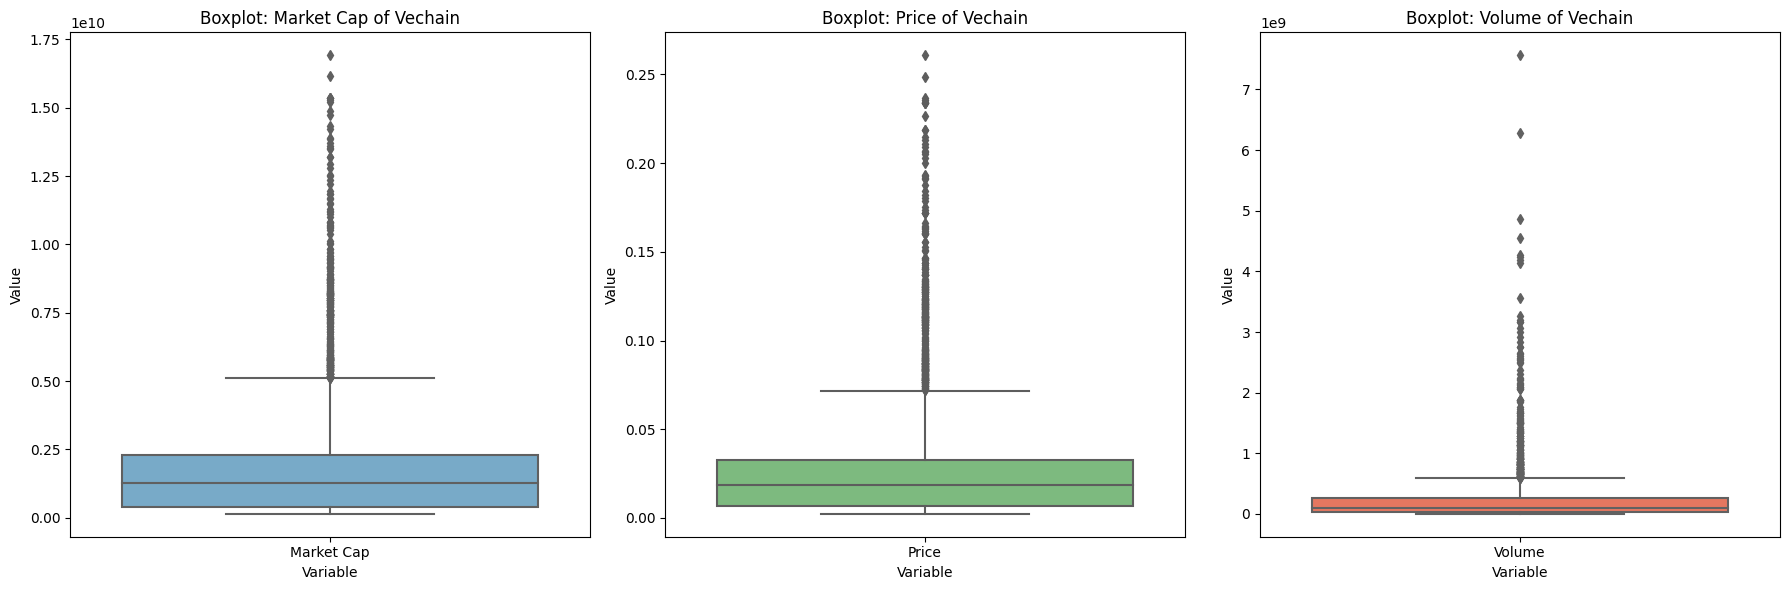

In [16]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Paletas predefinidas
palette = ['Blues', 'Greens', 'Reds']

# Boxplot de Market Cap
sns.boxplot(data=df[['Market Cap']], ax=axes[0], palette=palette[0])
axes[0].set_title(f'Boxplot: Market Cap of {coin.capitalize()}')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Value')

# Boxplot de Price
sns.boxplot(data=df[['Price']], ax=axes[1], palette=palette[1])
axes[1].set_title(f'Boxplot: Price of {coin.capitalize()}')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Value')

# Boxplot de Volume
sns.boxplot(data=df[['Volume']], ax=axes[2], palette=palette[2])
axes[2].set_title(f'Boxplot: Volume of {coin.capitalize()}')
axes[2].set_xlabel('Variable')
axes[2].set_ylabel('Value')

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

Se observa parte de los datos muy muy concentrados, los limites de las cajas (que representa la mitad central de los datos) se encuetran en valores muy cercanos de la escala.

La altura comparativa de la mediana de volumen indicaría que es el indicador menos volátil, precio y capitalización de mercado seria el orden, estas dos últimas, más volátil que el volumen. 
En general, el boxplot sugiere que es un activo volátil con una distribución muy concentrada.

Estas observaciones presentan discrepancias respecto de los valores estadísticos.

Un análisis más profundo y detallado de los valores atípicos en esta distribución puede permitir encontrar los fundamentos de las discrepancias observadas. 

Hay toda una serie de acciones para entender mejor esta discrepancia pero exceden el propósito de este trabajo.

Hay que consultar otras fuentes, ampliar el tamaño de la muestra e investigar más detalladamente contexto,  si ha ocurrido algún evento inusual o importante en este período de tiempo que podría haber afectado la distribución


Una vez superada esta etapa de evaluacion preliminar el proyecto, resuelve este tipo de situaciones para cada cripto como se propone en las conclusiones. 




# Gráficos de Evolución Temporal (line plot)

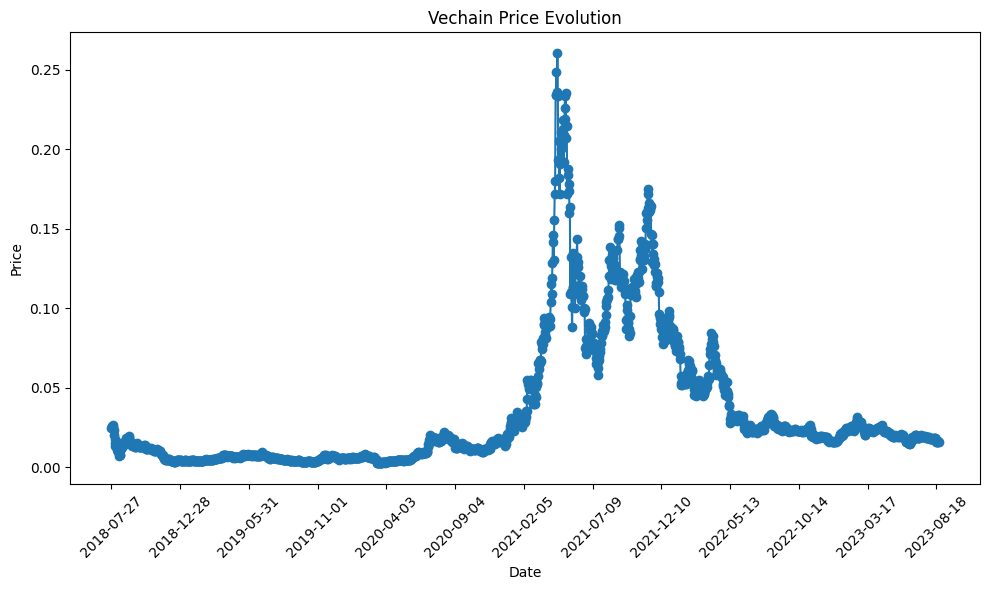

In [21]:
# Graficar la evolución del precio vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{coin.capitalize()} Price Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

plt.tight_layout()
plt.show()

La evolución del precio de VeChain desde su inicio ha sido positiva, pero ha experimentado una gran volatilidad. El precio de VET se disparó desde su lanzamiento en junio de 2017 hasta alcanzar un máximo histórico de 0,23 dólares en abril de 2018. Sin embargo, el precio ha disminuido desde entonces, y actualmente se cotiza a alrededor de 0,02 dólares.

VeChain se diferencia por mejorar cadenas de suministro y autenticación con blockchain. 

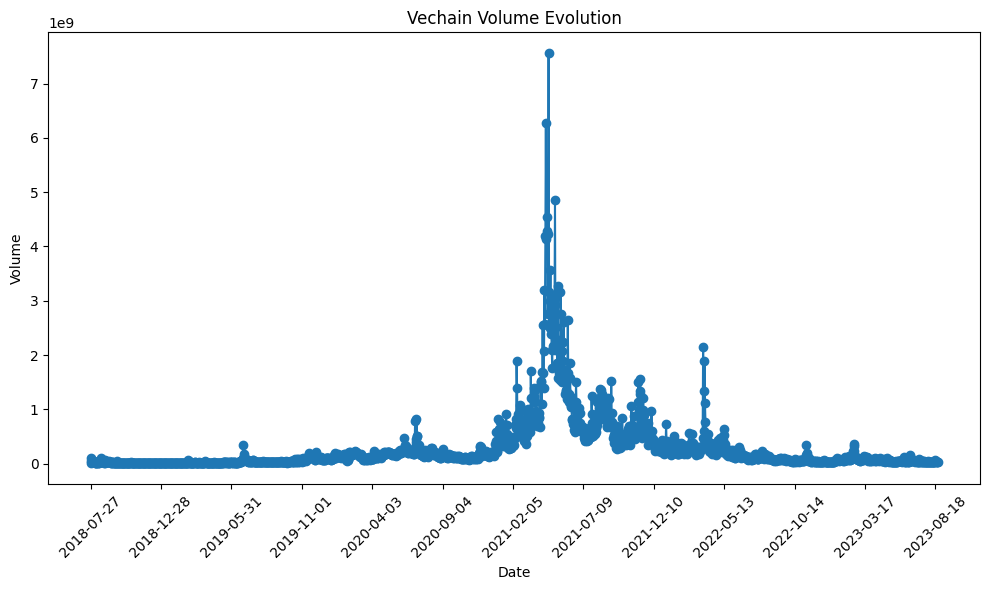

In [23]:
# Graficar la evolución del volumen vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{coin.capitalize()} Volume Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

# Guardar la gráfica en un archivo PNG
plt.savefig(f'png/{coin.capitalize()}_Volume_Evolution.png')

plt.tight_layout()
plt.show()

La evolución del volumen de VeChain desde su inicio ha sido positiva, pero ha experimentado una gran volatilidad. El volumen de VET se disparó desde su lanzamiento en junio de 2017 hasta alcanzar un máximo histórico de 5.000 millones de dólares en abril de 2018. Sin embargo, el volumen ha disminuido desde entonces, y actualmente se sitúa en torno a los 100 millones de dólares.

In [22]:
# Ejemplo de una serie de valores
data = df['Price']

# Calcula la media y la desviación estándar
mean = np.mean(data)
std = np.std(data)

# Calcula el coeficiente de curtosis
kurtosis = np.sum((np.array(data) - mean) ** 4) / (len(data) * std ** 4)

print("Coeficiente de Curtosis:", kurtosis)


Coeficiente de Curtosis: 7.612090928239752


Este coeficiente mayor de 3 indica que hay una mayor probabilidad de observar valores atípicos o extremos en la distribución de los precios en comparación con lo que sería esperado bajo una distribución normal.

# Conclusiones Preliminares para Vechain

Los distintos gráficos, cálculos y métricas evaluadas no resultan consistentes, dificultando el entendimiento el comportamiento histórico de esta criptomoneda.     

El precio diario ha mostrado una distribución leptocúrtica(Coeficiente de Curtosis > 3), en el ambito de las criptomonedas explican esta distribución partir de su volatilidad de mercado en comparación con otros activos financieros. La volatilidad del mercado implica que el precio puede cambiar mucho en un corto período de tiempo. 

El volumen es una medida de la cantidad que se negocia en un período de tiempo determinado, los especialistas explican la baja liquidez en que no hay muchos compradores y vendedores en comparacion con otros activos financieros u otras criptomonedas.

Se considera tambien que la menor regulación de criptomonedas en comparación con otros activos financieros puede explicar un comportamiento más especulativo, contribuyendo a aumentar la volatilidad del mercado.

La volatilidad puede deberse a que como todo proyecto sea nuevo, aún no haya desarrollado una base de inversores sólida o algunas posiciones tomadas por grandes inversores lo hacen más propenso a fluctuar.

Su adopción empresarial, soluciones prácticas e innovación técnica respaldan su potencial. Colaboraciones con empresas reconocidas y un equipo experimentado también contribuyen a su atractivo en el espacio blockchain. 

# Vechain es un activo financiero con potencial de ganancias y pérdidas significativas. 

En caso de superar esta etapa de evaluacion preliminar, se recomienda un detallado análisis técnico, fundamental y de sentimiento para Vechain.